In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
# For processing the data, I'll import a few libraries. To split the available dataset for testing and training, I'll use the train_test_split method. To scale the features, I am using StandardScaler.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
data=pd.read_csv('heart_cleveland_upload.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [7]:
data.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


<AxesSubplot:xlabel='condition', ylabel='count'>

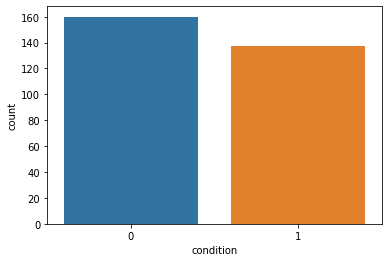

In [9]:
data['condition'].value_counts()
sns.countplot(x='condition',data=data)

<AxesSubplot:>

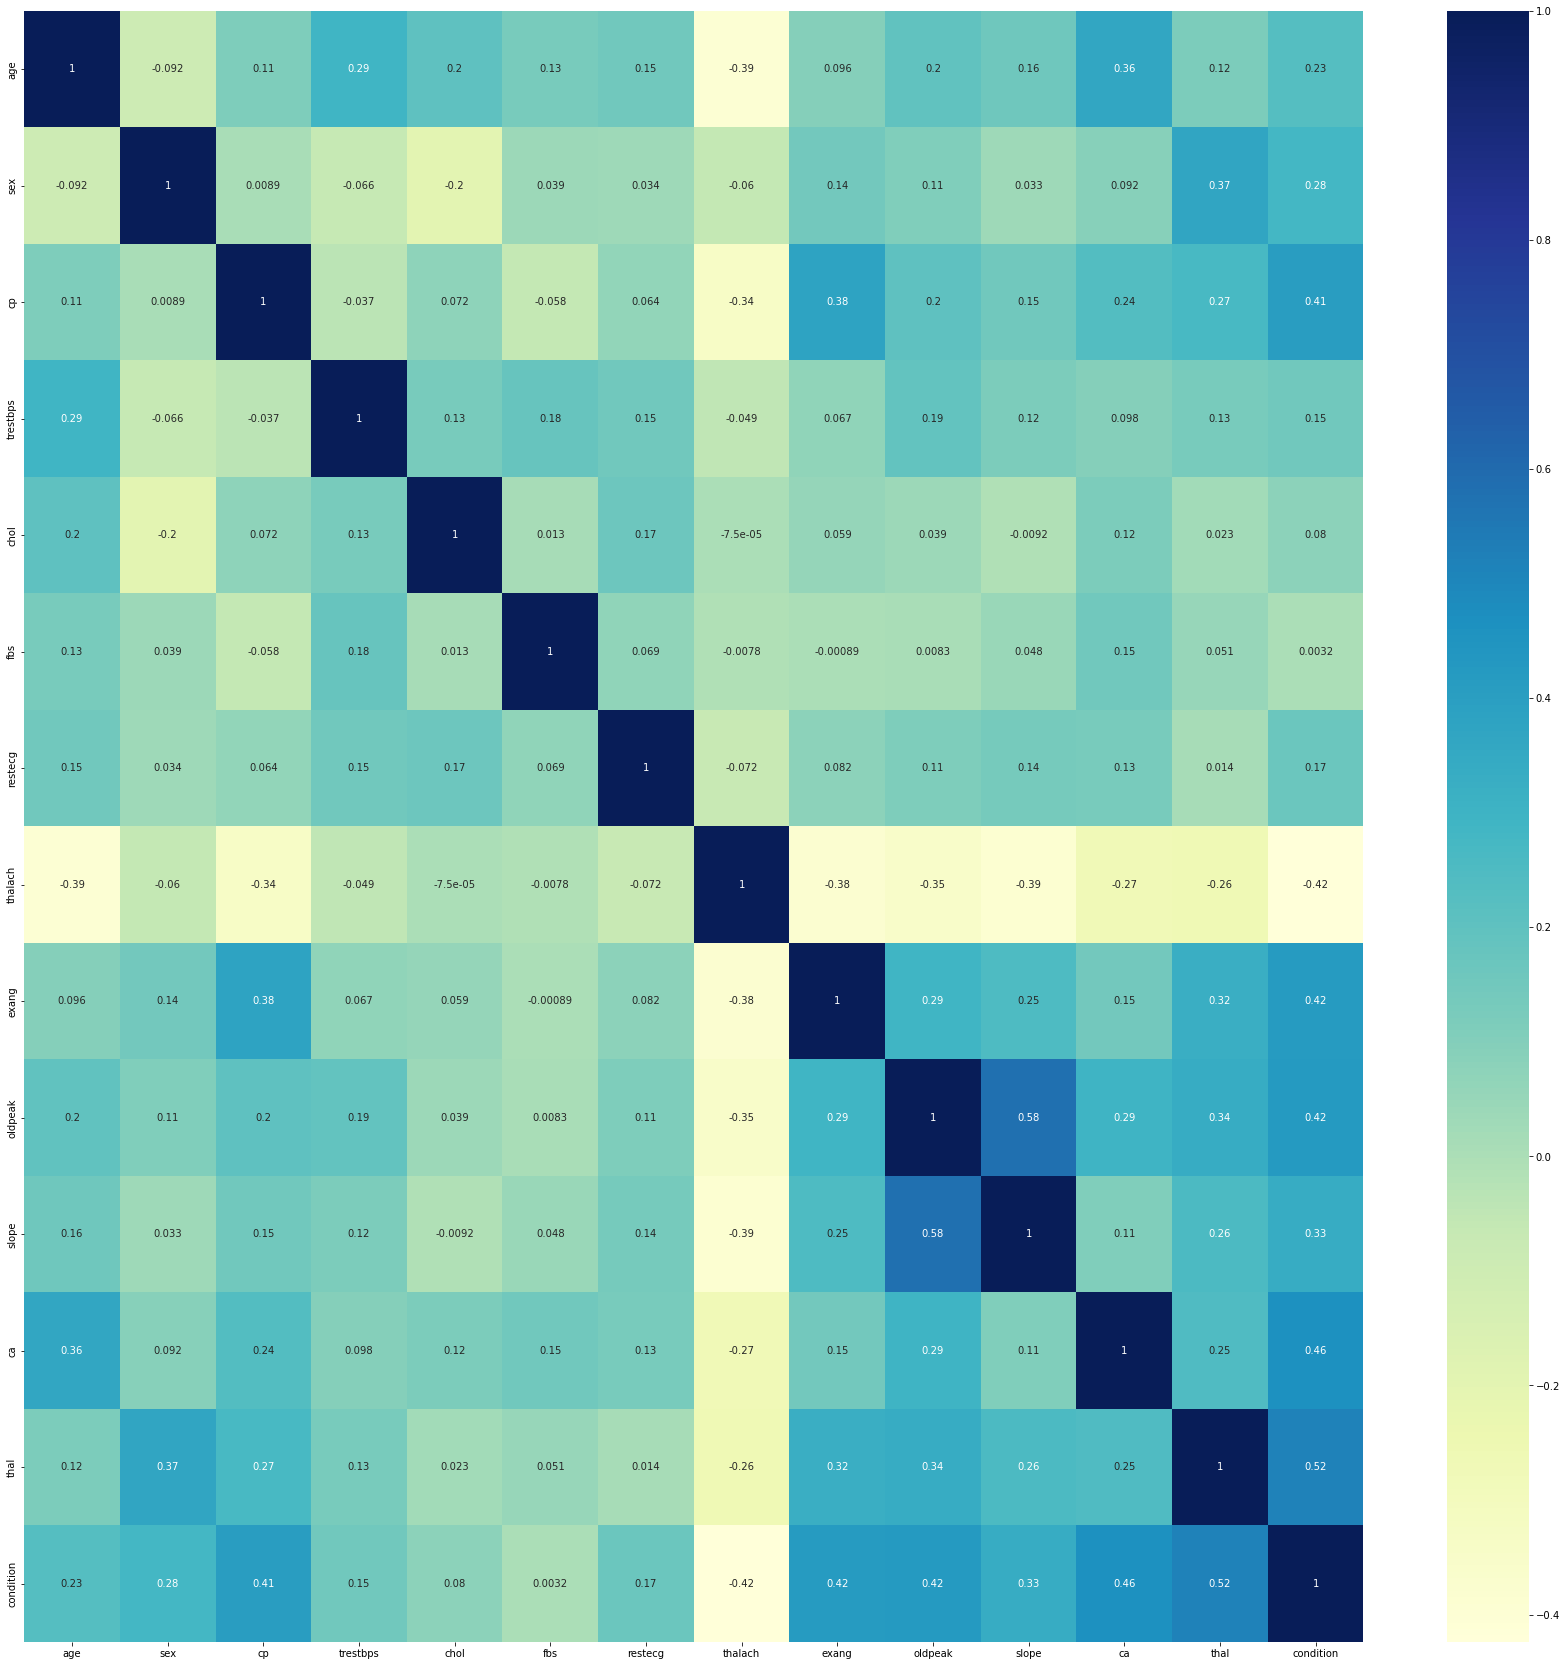

In [10]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'trestbps'}>,
        <AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'sex_0'}>,
        <AxesSubplot:title={'center':'sex_1'}>,
        <AxesSubplot:title={'center':'cp_0'}>,
        <AxesSubplot:title={'center':'cp_1'}>,
        <AxesSubplot:title={'center':'cp_2'}>,
        <AxesSubplot:title={'center':'cp_3'}>],
       [<AxesSubplot:title={'center':'cp_0'}>,
        <AxesSubplot:title={'center':'cp_1'}>,
        <AxesSubplot:title={'center':'cp_2'}>,
        <AxesSubplot:title={'center':'cp_3'}>,
        <AxesSubplot:title={'center':'fbs_0'}>,
        <AxesSubplot:title={'center':'fbs_1'}>],
       [<AxesSubplot:title={'center':'restecg_0'}>,
        <AxesSubplot:title={'center':'restecg_1'}>,
        <AxesSubplot:title={'

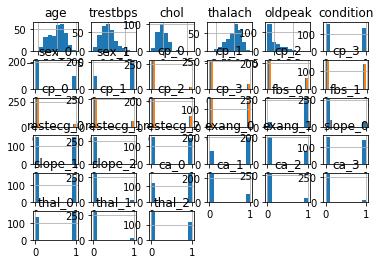

In [27]:

data.hist()

In [12]:
data=pd.get_dummies(data,columns=['sex','cp','cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [13]:
sc=StandardScaler()
columns_to_scale=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = sc.fit_transform(data[columns_to_scale])


In [14]:
y=data['condition']
X=data.drop(['condition'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [15]:
knn_scores=[]
for k in range(1,21):
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test,y_test))

<AxesSubplot:>

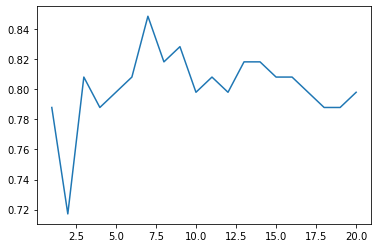

In [16]:
sns.lineplot([k for k in range(1,21)],knn_scores)

In [17]:
print("The score for K Neighbors Classifier is {}% with {} neighbors".format(knn_scores[6]*100, 6))

The score for K Neighbors Classifier is 84.84848484848484% with 6 neighbors


Support Vector Machine


In [18]:
svc_scores=[]
kernels=['linear','poly','rbf','sigmoid']
for s in range(len(kernels)):
    sc=SVC(kernel=kernels[s])
    sc.fit(X_train,y_train)
    svc_scores.append(sc.score(X_test,y_test))

[0.8585858585858586, 0.8484848484848485, 0.8686868686868687, 0.8181818181818182]


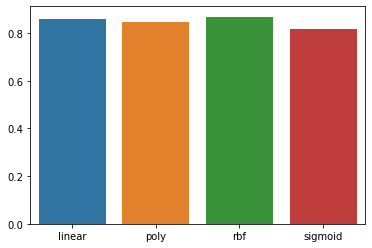

In [19]:
# 
sns.barplot(kernels,svc_scores)
print(svc_scores)

In [20]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[2]*100, 'rbf'))

The score for Support Vector Classifier is 86.86868686868688% with rbf kernel.


In [21]:
rf_scores=[]
estimators=[10,100,200,500,1000]
for e in estimators:
    rf=RandomForestClassifier(n_estimators=e,random_state=0)
    rf.fit(X_train,y_train)
    rf_scores.append(rf.score(X_test,y_test))

[0.8080808080808081, 0.8282828282828283, 0.8282828282828283, 0.8484848484848485, 0.8383838383838383]


<AxesSubplot:>

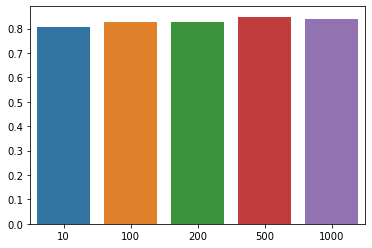

In [22]:
print(rf_scores)
sns.barplot(estimators,rf_scores)

In [23]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[3]*100, [500]))

The score for Random Forest Classifier is 84.84848484848484% with [500] estimators.


We have implemented a classification problem which will help us identify whether a person has a heart condition or not. WE have used support vector machines, KNN, Random Forest and support vector with rbf kernel gives us the highest score of 86.86%. Thus, support vector will be the right algorithm to choose in this case
